In [1]:
import numpy
import pandas
import matplotlib.pyplot

file_LC='data_paipai/LC.csv'
file_LP='data_paipai/LP.csv'

LC=pandas.read_csv(file_LC)
LP=pandas.read_csv(file_LP)

print(LC)
print(LP)

ListingId   借款金额  借款期限  借款利率      借款成功日期 初始评级   借款类型 是否首标  年龄 性别  ...  \
0          126541  18000    12  18.0  2015-05-04    C     其他    否  35  男  ...   
1          133291   9453    12  20.0  2015-03-16    D     其他    否  34  男  ...   
2          142421  27000    24  20.0  2016-04-26    E     普通    否  41  男  ...   
3          149711  25000    12  18.0  2015-03-30    C     其他    否  34  男  ...   
4          152141  20000     6  16.0  2015-01-22    C     电商    否  24  男  ...   
5          162641  20000    12  14.0  2015-03-25    A     普通    否  36  男  ...   
6          171191   3940     6  18.0  2015-06-26    E     电商    否  27  女  ...   
7          175451  20000    12  18.0  2016-03-19    B     普通    否  32  男  ...   
8          182261  25000    12  16.0  2015-03-21    B     其他    否  33  女  ...   
9          193831  10475     6  18.0  2015-04-15    C     电商    否  25  男  ...   
10         199461  25000    12  20.0  2015-11-29    E     普通    否  29  男  ...   
11         209191  20000    12  20.0

In [ ]:
#LC.info()
#LC.describe()
#观察一下年龄分布，最小17岁，最大56岁，平均年龄29岁，33岁以下的占比超过了75%。说明用户整体还是中青年。
#将年龄分为'15-20', '20-25', '25-30', '30-35', '35-40', '40+'比较合理
#观察一下借款金额分布，最小借款金额为100元，最大为50万元，平均值为4424元，低于5230的借款金额占到了75%。
#说明应该是小额借款比较多。将借款金额分为0-2000，2000-3000，3000-4000，4000-5000，5000-6000，6000以上比较合理
#LC['ListingId'].value_counts()
# LP.info()
# LP.describe()
# LP = LP.dropna(how='any')
# LP.info()
# LC = LC.dropna(how='any')
# 数据很干净

([<matplotlib.patches.Wedge at 0x20f8bcad630>,
 [Text(-0.6152268248749628, 0.9118639997029557, '男'),
  Text(0.6152269102498288, -0.9118639421012597, '女')],
 [Text(-0.335578268113616, 0.49738036347433945, '68.9%'),
  Text(0.3355783146817247, -0.49738033205523247, '31.1%')])

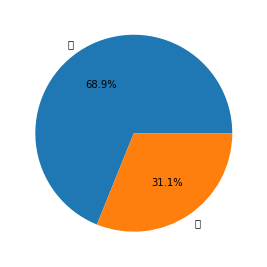

In [3]:
#性别分析
#coding: UTF-8
male = LC[LC['性别'] == '男']
female = LC[LC['性别'] == '女']
sex = (male,female)
sex_data = (male['借款金额'].sum(), female['借款金额'].sum())
sex_idx = ('男', '女')
matplotlib.pyplot.figure(figsize=(15, 6))
matplotlib.pyplot.subplot(1,3,1)
matplotlib.pyplot.pie(sex_data, labels=sex_idx, autopct='%.1f%%')